In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np

### 로이터 데이터 셋 

In [27]:
#46개 상호 배타적인 토픽으로 뉴스를 분류하는 신경망 만들기 
from tensorflow.keras.datasets import reuters 
(train_data, train_labels), (test_data,test_labels)= reuters.load_data(num_words=10000)

In [28]:
len(train_data)
len(test_data)

2246

In [33]:
#로이터 데이터셋을 텍스트로 디코딩
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newswire

'???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3'

In [30]:
train_labels[94]
#샘플에 연결된 레이블은 토픽의 인덱스로 0-45 사이 정수

2

In [38]:
train_labels.max()

45

In [31]:

#정수 시퀀스를 멀티 - 핫 인코딩하기 , 리스트를 numpy로 바꿔주기 
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results

#벡터변환
x_train= vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data) 

#레이블 원- 핫 인코딩, 0~45 정수라 y도 인코딩 해줘야함 , label 뉴스 총개수 
def to_one_hot (labels,dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1. #float32 의 1. -> 소수로 바꿔야함 
    return results
y_train= to_one_hot(train_labels)
y_test=to_one_hot(test_labels)

In [40]:
#케라스에 레이블 인코딩하는 내장함수  -> 위에거 대신
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_data)
y_test = to_categorical(test_data)
#dataframe -> pandas 의 get_dummies 사용 가능 

ValueError: setting an array element with a sequence.

In [32]:
#모델정의 
model = keras.Sequential([layers.Dense(64, activation ='relu'),
                         layers.Dense(64, activation = 'relu'),
                         layers. Dense(46, activation='softmax')])
#마지막 dense 46 -> 각 입력 샘플에 46 차원 벡터 출력 
#softmax 활성화 함수 -> 각 입력 샘플마다 46개 출력 클래스에 대한 확률 분포 출력 
#wmr, 46차원 출력 벡터를 만들며 output[i ] =어떤 샘플이 i 클레스에 속할 확률 , 46개 값 더하면 1 

In [34]:
#모델 컴파일
#categorical_crossentropy, 두 확률 분포 사이의 거리 측정 (모델이 출력한 확률 분포와 진짜 레이블 분포 사이의 거리) 
model.compile(optimizer ='rmsprop', 
             loss ='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
#훈련검증 
#훈련에서 1000개 샘플 떼서 검증 세트로 사용 
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=y_train[:1000]
partial_y_train= y_train[1000:]

In [41]:
#훈련 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 2.7540 - accuracy: 0.5129 - val_loss: 1.7945 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4976 - accuracy: 0.6875 - val_loss: 1.3648 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.1557 - accuracy: 0.7483 - val_loss: 1.2014 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9615 - accuracy: 0.7859 - val_loss: 1.1131 - val_accuracy: 0.7460
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7968 - accuracy: 0.8265 - val_loss: 1.0167 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6708 - accuracy: 0.8513 - val_loss: 0.9704 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5602 - accuracy: 0.8763 - val_loss: 0.9311 - val_accuracy: 0.7940
Epoch 8/20
16

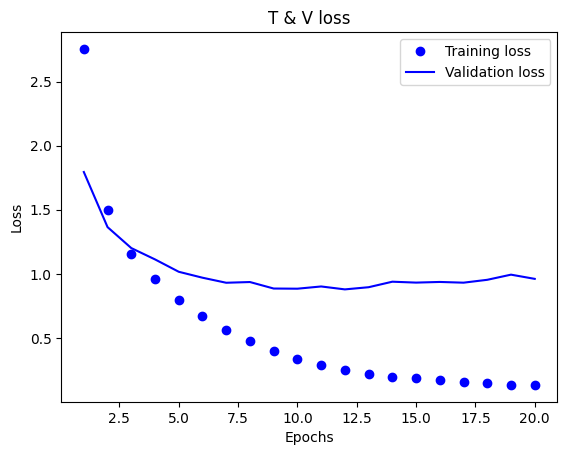

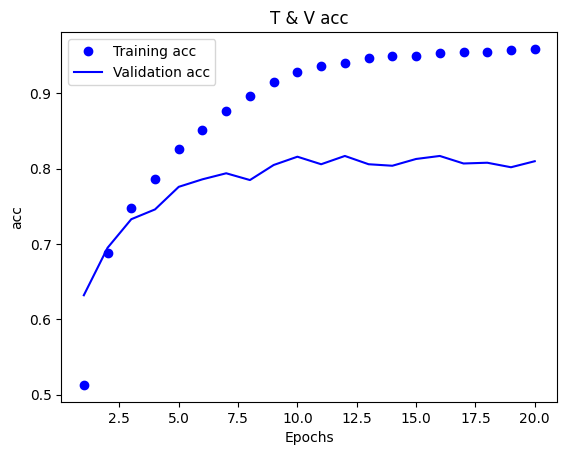

In [42]:
#훈련 검증 손실 & 정확도 곡선 
#훈련과 검증 손실 
import matplotlib.pyplot as plt
history_dict=history.history
loss_values= history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')#bo파란색 점  

plt.plot(epochs, val_loss_values,"b",label='Validation loss')#b 파란색 실선
plt.title('T & V loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

#훈련과 검증 정확도
plt.clf() #그래프 초기화 
acc= history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')#bo파란색 점  
plt.plot(epochs, val_acc,"b",label='Validation acc')#b 파란색 실선
plt.title('T & V acc')
plt.xlabel('Epochs')
plt.ylabel('acc') 
plt.legend()
plt.show()

#손실 낮아지고 정확도 올라가야함 , 9번째 이후 과대적합 

In [44]:
#모델 처음부터 다시 훈련
model = keras.Sequential([layers.Dense(64, activation ='relu'),
                         layers.Dense(64, activation = 'relu'),
                         layers. Dense(46, activation='softmax')])

model.compile(optimizer ='rmsprop', 
             loss ='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results=model.evaluate(x_test, y_test)
results

Epoch 1/9
16/16 [==============================] - 1s 23ms/step - loss: 2.8124 - accuracy: 0.4567 - val_loss: 1.8968 - val_accuracy: 0.6010
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.5643 - accuracy: 0.6642 - val_loss: 1.3874 - val_accuracy: 0.6920
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.1936 - accuracy: 0.7372 - val_loss: 1.2057 - val_accuracy: 0.7490
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.9747 - accuracy: 0.7918 - val_loss: 1.0750 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.7996 - accuracy: 0.8281 - val_loss: 1.0179 - val_accuracy: 0.7770
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6631 - accuracy: 0.8602 - val_loss: 0.9467 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5524 - accuracy: 0.8841 - val_loss: 0.8994 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

[0.9334152936935425, 0.784060537815094]

In [46]:
model.predict(x_test)
#총 하나당 46개의 예측 이고 가장 큰 값이 예측 클래스 -> 확률이 가장 높은 클래스

71/71 [==============================] - 0s 2ms/step


array([[3.2561107e-05, 4.0600804e-04, 1.6245160e-06, ..., 2.4225230e-05,
        2.4292772e-06, 7.8777366e-06],
       [3.3388883e-02, 1.3788366e-01, 5.7830615e-03, ..., 2.2362916e-04,
        3.7432053e-06, 2.0636124e-05],
       [4.9230363e-03, 7.0184183e-01, 1.0920176e-02, ..., 1.7690466e-04,
        2.9976407e-04, 4.1305940e-04],
       ...,
       [4.7624864e-05, 7.1810419e-04, 4.9516970e-05, ..., 1.1840546e-04,
        2.0997268e-04, 9.5572061e-05],
       [4.6021519e-03, 2.3448132e-02, 3.5709384e-04, ..., 8.9862593e-04,
        2.9692025e-04, 2.1686245e-04],
       [1.9943346e-03, 5.1207495e-01, 2.8377736e-02, ..., 2.5987683e-04,
        3.2184963e-04, 4.3435179e-04]], dtype=float32)

In [47]:
model.predict(x_test[0:1]).argmax()

1/1 [==============================] - 0s 22ms/step


3

In [50]:
np.argmax(model.predict(x_test)[0])

71/71 [==============================] - 0s 2ms/step


3

### 주택가격예측 : 회귀문제

In [96]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets)= (boston_housing.load_data())

In [97]:
len(train_data)
len(test_data)

102

In [98]:
train_data #앞에 대괄호 두개 -> 2차원 

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01, 3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01, 3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01, 2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01, 3.76700e+02, 4.38000e+00]])

In [99]:
train_data.shape

(404, 13)

In [100]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1, 17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5,
       24.1, 27.5, 10.9, 30.8, 32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9, 23.1, 34.9, 25. ,
       13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7, 12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8,
       19.1, 22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3, 15.6, 10.5,  6.3, 19.3, 19.3, 13.4,
       36.4, 17.8, 13.5, 16.5,  8.3, 14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5, 14.6, 13.4,
       23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1, 28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2,
       11.7, 21.7, 19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6, 18.2,  8.7, 44. , 10.4, 13.2,
       21.2, 37. , 30.7, 22.9, 20. , 19.3, 31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8, 19.6,
       23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13.5, 26.6, 21.4, 11.9, 22.6, 19.6,  

In [101]:
#데이터 정규화
#표준화 mean 0 표준편차 1
#test_data 정규화할때 훈련데이터에서 계산한 값 ! 절대로 테스트데이터 값 사용 안됨
mean=train_data.mean(axis=0) #축별로 mean 
train_data-=mean
std= train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [102]:
#모델 정의
#활성화 함수(출력함수 제한 ) 없음 -> 회귀 스칼라 (하나의 연속적인 값 예측)
def build_model ():
    model= keras.Sequential ([
    layers.Dense(64, activation ='relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)])
    model.compile(optimizer ='rmsprop', loss='mse', metrics=['mae'])
    return model 

In [103]:
#훈련 검증 kfold
k=4
num_val_samples=len(train_data)//k
num_epochs = 100
all_scores=[]
for i in range (k):
    print(f'{i}번째 폴드 처리 중')
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples] 
#num_val_samples 검증 데이터 준비 
    val_targets= train_targets[i * num_val_samples: (i+1) * num_val_samples]

    partial_train_data = np.concatenate ([train_data[:i * num_val_samples],
                                       train_data[(i+1)* num_val_samples:]], axis=0 )

    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)




0번째 폴드 처리 중
1번째 폴드 처리 중
2번째 폴드 처리 중
3번째 폴드 처리 중


In [105]:
num_epochs = 500
all_mae_histories = [] 
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate( 
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
     axis=0)
    partial_train_targets = np.concatenate(
     [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
     axis=0)
    model = build_model() 
    history = model.fit(partial_train_data, partial_train_targets, 
     validation_data=(val_data, val_targets),
     epochs=num_epo- rkr vhhs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)


Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [106]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range (num_epochs)]

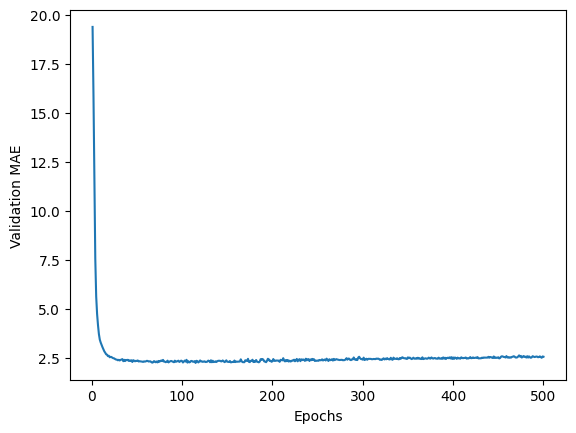

In [107]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

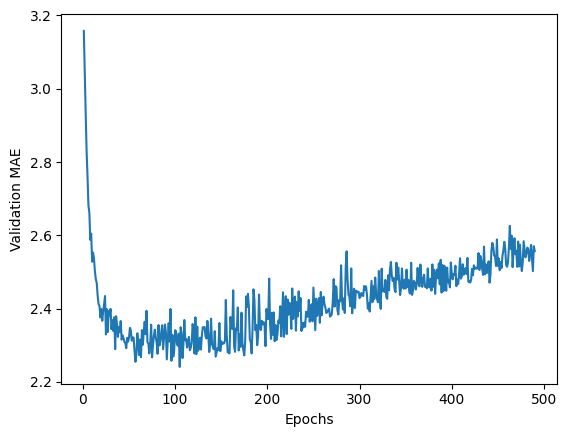

In [108]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [110]:
model = build_model() 
model.fit(train_data, train_targets, 
 epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 15.1738 - mae: 2.4886


In [111]:
test_mae_score

2.488637685775757

In [113]:
predictions=model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 1ms/step


array([7.8508706], dtype=float32)

In [76]:
model= build_model()
history= model.fit(train_data, train_targets, epochs=130, batch_size =16, verbose =0)
history.history['loss']

val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
partial_train_data = np.concatenate( [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],
axis=0) partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
train_targets[(i + 1) * num_val_samples:]],axis=0)
model = build_model()
model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0) all_scores.append(val_mae)


 val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate( [train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],
 axis=0)
 partial_train_targets = np.concatenate(
 [train_targets[:i * num_val_samples],
 train_targets[(i + 1) * num_val_samples:]],
 axis=0)
 model = build_model()
model.fit(partial_train_data, partial_train_targets,
 epochs=num_epochs, batch_size=16, verbose=0)val_mse, val_mae = model.(val_data, val_targets, verbose=0)all_scores.append(val_mae)


SyntaxError: invalid syntax (3073705835.py, line 7)

In [68]:
history.history['mae']

[19.87307357788086,
 15.16624927520752,
 9.302973747253418,
 5.963306427001953,
 4.568565845489502,
 3.9180548191070557,
 3.4790477752685547,
 3.264223098754883,
 3.0391011238098145,
 2.9233083724975586,
 2.7808218002319336,
 2.7052829265594482,
 2.6295459270477295,
 2.5426247119903564,
 2.5054335594177246,
 2.420928716659546,
 2.372249126434326,
 2.3568968772888184,
 2.3259518146514893,
 2.2712912559509277,
 2.2545876502990723,
 2.237774133682251,
 2.253382921218872,
 2.170452833175659,
 2.1757216453552246,
 2.1600136756896973,
 2.1230826377868652,
 2.116762161254883,
 2.1178290843963623,
 2.054020881652832,
 2.0581583976745605,
 2.081936836242676,
 2.078988790512085,
 2.0331292152404785,
 2.0432560443878174,
 2.024376392364502,
 2.0073964595794678,
 1.9947056770324707,
 1.9856590032577515,
 1.9380096197128296,
 1.9492769241333008,
 1.9627306461334229,
 1.929733395576477,
 1.9397916793823242,
 1.9049948453903198,
 1.9447181224822998,
 1.9173009395599365,
 1.9128414392471313,
 1.923830

In [69]:
model.predict(test_data)

4/4 [==============================] - 0s 1ms/step


array([[ 8.185704 ],
       [18.271854 ],
       [21.541801 ],
       [35.523968 ],
       [24.741323 ],
       [22.795547 ],
       [27.902794 ],
       [22.442694 ],
       [19.044804 ],
       [21.658642 ],
       [19.097546 ],
       [16.02457  ],
       [15.274125 ],
       [43.32948  ],
       [20.68976  ],
       [20.691387 ],
       [26.08276  ],
       [18.283684 ],
       [18.340515 ],
       [25.88637  ],
       [10.836934 ],
       [12.239945 ],
       [21.823193 ],
       [16.921608 ],
       [18.83279  ],
       [24.816406 ],
       [29.111214 ],
       [30.279285 ],
       [11.057002 ],
       [18.769854 ],
       [19.709631 ],
       [15.72182  ],
       [32.891415 ],
       [23.87172  ],
       [19.042562 ],
       [ 6.6555047],
       [16.539902 ],
       [17.305866 ],
       [18.014633 ],
       [26.67633  ],
       [32.253857 ],
       [27.360983 ],
       [12.910013 ],
       [42.88432  ],
       [28.294773 ],
       [26.116974 ],
       [28.003254 ],
       [18.71

In [71]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 15.4440 - mae: 2.4305


[15.443964958190918, 2.430501937866211]

In [ ]:
plr.plor(range(1,history.history['' ])
    maex.,,,,,sg
        데-이터가어떻게저열ㄹ되어있는지 나누는것
         보다다

### 패션 분류 문제 

In [8]:
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

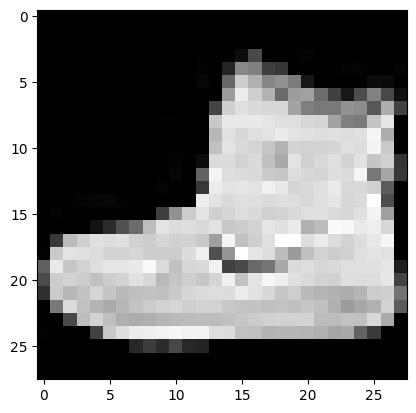

In [11]:
import matplotlib.pyplot as plt
train_images[0]
plt.imshow(train_images[0], cmap='gray') #사진보기 

In [13]:
import numpy as np
np.set_printoptions(linewidth=4*29) 
print(train_images[0]) #0은 검정 숫자가 커질수록 밝음 , 축소해서 보면 위에 신발모양 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [18]:
train_labels[0]
import tensorflow as tf
from tensorflow import keras

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

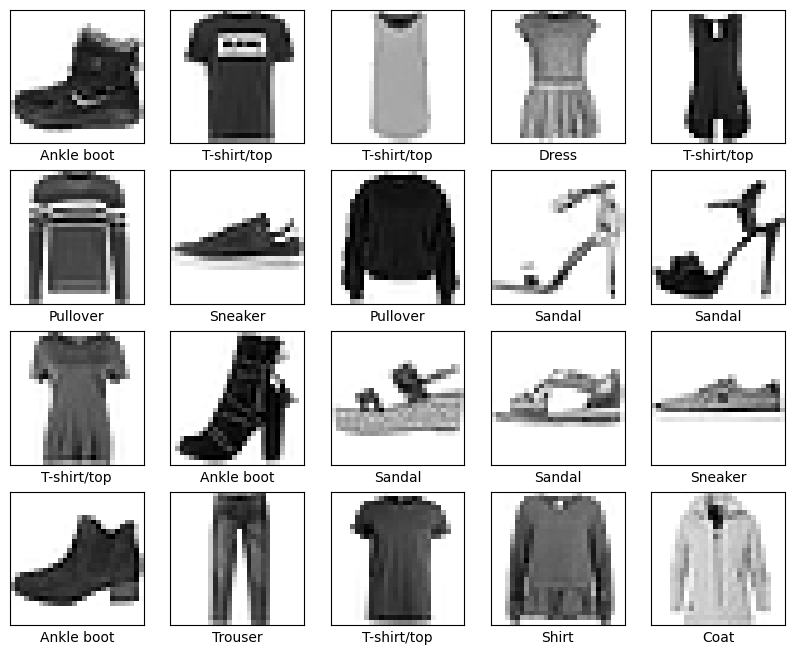

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
#Flatten 학습 아니고  28,28 2차원 배열을 784의 1차원 배열로 바꿔줌 
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(64, activation = 'relu'),
                         keras.layers. Dense(10, activation='softmax')])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer ='adam', 
             loss ='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#여기선 sparse 사용해야함 

In [27]:

#훈련 
history = model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5140 - accuracy: 0.8202
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3895 - accuracy: 0.8623
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3514 - accuracy: 0.8734
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3273 - accuracy: 0.8805
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3095 - accuracy: 0.8865
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2951 - accuracy: 0.8931
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.8954
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2745 - accuracy: 0.8979
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2639 - accuracy: 0.9025
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.258

In [28]:
prediction=model.predict(test_images)
prediction[0]
#처음 사진이 총 10가지의 어떤 class 에 속할 확률을 반환 , 마지막이 제일 높음 

313/313 [==============================] - 0s 933us/step


array([6.83973657e-13, 4.29167668e-20, 3.15553275e-13, 1.48211287e-11, 2.29510644e-16, 1.00791774e-04,
       7.15440068e-11, 1.28699490e-03, 1.66996950e-12, 9.98612165e-01], dtype=float32)

In [29]:
test_labels[0] #정답 맞음 

9

In [41]:
#데이터 시각화 
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

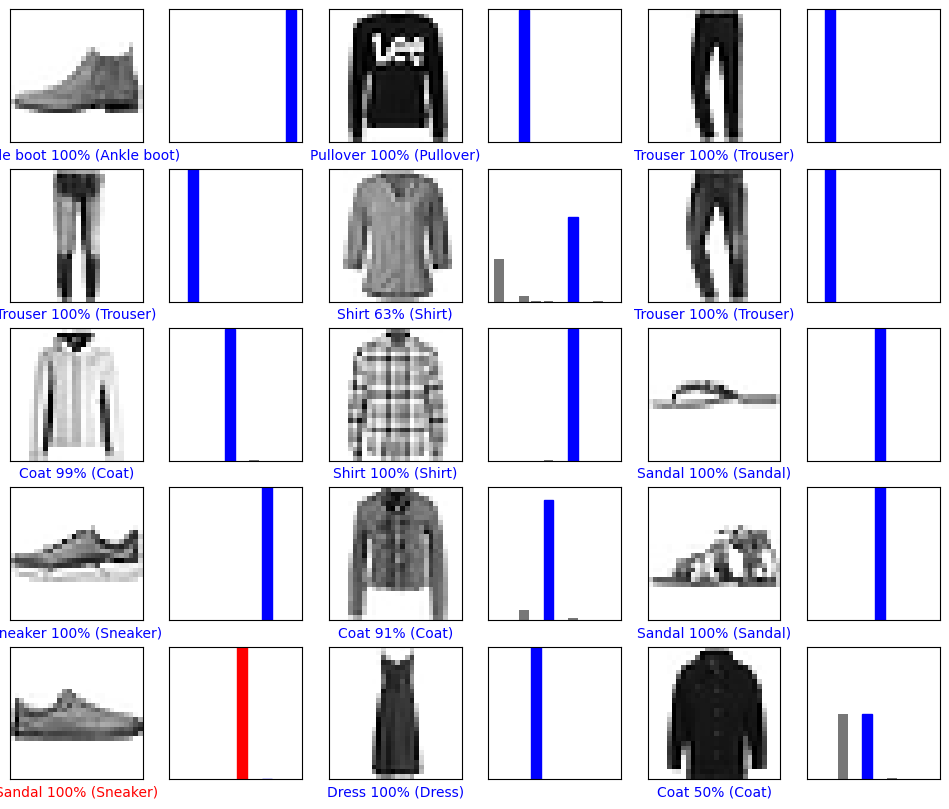

In [42]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction, test_labels)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(tf.math.argmax(prediction, -1), test_labels) #88.96퍼세센트 

0.8896

### 텐서플로우 써서 만들기

In [150]:

import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform (w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable (w_initial_value)
        
        b_shape=(output_size, )
        b_initial_value= tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)
        
    def __call__(self,inputs):
        return self.activation (tf.matmul(inputs, self.W + self.b))
    
    @property
    def weights(self):
        return [self.W, self.b]
    
    
class NaiveSequential:
    def __init__(self,layers):
        self.layers=layers
        
    def __call__(self,inputs):
        x=inputs
        for layer in self.layers:
            x=layer(x)
        return x
    
    @property #데코레이터 밑에 함수를 부르기전에 다른함수 적용 
    def weights(self):
        weights=[]
        for layer in self.layers:
            weights += layer.weights
        return weights

In [151]:
model= NaiveSequential([
    NaiveDense(input_size=28*28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size =10, activation = tf.nn.softmax)
])
assert len(model.weights)==4

In [152]:
#배치 제너레이터 mnist 데이터 미니배치로 순회 
import math
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels= labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images)/ batch_size)
        
    def next (self):
        images=self.images[self.index: self.index +self.batch_size]
        labels=self.labels[self.index: self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [1]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        #정방향 패스 gradient block 안에서 
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients=tape.gradient(average_loss,model.weights)
    update_weights(gradients, model.weights) #가중치 업데이트 
    return average_loss

In [155]:
def fit (model, images,labels,epochs, batch_size=128):
    for epoch_counter in range (epochs):
        print(f'epochs 횟수:{epoch_counter}')
        batch_generator=BatchGenerator(images, labels)
        for batch_counter in range (batch_generator.num_batches): 
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0: #100번 배치를 가져올때마다 
                print (f'{batch_counter}번째 배치 손실 : {loss:.2f}')

In [156]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
train_images= train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255
test_images= test_images.reshape((10000,28*28))
test_images = test_images.astype ('float32')/ 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

epochs 횟수:0
0번째 배치 손실 : 4.04
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:1
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:2
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:3
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:4
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:5
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:6
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:7
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:8
0번째 배치 손실 : 13.85
100번째 배치 손실 : 14.86
200번째 배치 손실 : 14.86
300번째 배치 손실 : 14.23
400번째 배치 손실 : 14.23
epochs 횟수:9